# Test Case 1

## 1. Theory

The first case to be considered is the determination of the plane wave reflection coefficient according to the measured pressure. A source $\mathbf{s}$ generates a plane wave $P(r)=Pe^{jkr}$, that reaches the receiver $\mathbf{r}$ by the direct path $r_1$ and the reflected $r_2$.

![title](planewave.png)

In the frequency domain, the total pressure measured at $\mathbf{r}$, $P_t$, is the sum of the direct and reflected sound.

$$P_t=P\Bigg(\frac{H_1}{r_1}e^{jkr_1}+\frac{H_2}{r_2}R_pe^{jkr_2}\Bigg)$$

where $H_1$ is the directivity response of the source in the direct path, $H_2$ the directivity response in the reflected path and $R_p$ the plane wave reflection coefficient, defined as the ratio between direct and reflected sound pressure.

$$R_p(\alpha)=\frac{p_r}{p_i}=\frac{Z_s\cos(\alpha)-\rho c}{Z_s\cos(\alpha)+\rho c}$$

Usually, the desired value is the ground effect which is

$$\frac{P_t}{P_1}=H_1+H_2\frac{r_1}{r_2}R_pe^{jk{\Delta r}},$$

where $P_1=\frac{P}{r_1}e^{jkr_1}$ is the pressure that reaches the receiver through the direct path and $\Delta r=r_2-r_1$.The reflection coefficient is dependent on the surface impedace of the material $Z_s$, the angle of incidence $\alpha$, the speed of sound $c=20.05\sqrt{273.15+t_0}$, being $t_0$ the measured temperature in celsius, and the density of air $\rho$. Thanks to the previous work done by other authors like Delaney and Bazley the surface impedance of porous materials can be approximated by a power law expression dependent on a parameter common for all the frequencies that defines the material. This is the flow resistivity $\sigma$, given in [Ns/m$^4]$

$$Z_s=\rho c\Bigg(1+9.08\Bigg(\frac{1000f}{\sigma}\Bigg)^{-0.75}-j11.9\Bigg(\frac{1000f}{\sigma}\Bigg)^{-0.73}\Bigg)$$.

This expression was improved by Miki et al. defining it in a causal form

$$Z_s=\rho c\Bigg(1+5.51\Bigg(\frac{1000f}{\sigma}\Bigg)^{-0.632}-j8.42\Bigg(\frac{1000f}{\sigma}\Bigg)^{-0.632}\Bigg)$$.

It can be seen that inferring $\sigma$ the impedance and therefore the reflection coefficient are also inferred. In order to infer the flow resistivity of the surface from measurements using STAN, real and imaginary parts need to be isolated as complex numbers are not supported by the platform. Therefore we will have for each frequency band the following (subindexes $r$ and $i$ represent real and imaginary parts respectively)

$$\text{Re}\left(\frac{P_t}{P_1}\right)=H_{1r}+\frac{r_1}{r_2}\Bigg((H_{2r}R_{pr}-H_{2i}R_{pi})\cos(k\Delta r)-(H_{2r}R_{pi}+H_{2i}R_{pr})\sin(k\Delta r)\Bigg)$$
$$\text{Im}\left(\frac{P_t}{P_1}\right)=H_{1i}+\frac{r_1}{r_2}\Bigg((H_{2r}R_{pr}-H_{2i}R_{pi})\sin(k\Delta r)+(H_{2r}R_{pi}+H_{2i}R_{pr})\cos(k\Delta r)\Bigg)$$

The surface impedance then can be defined as

$$Z_s=\rho c(A+jB)$$

and the reflection coefficient

$$R_p=\frac{(A+jB)\cos(\alpha)-1}{(A+jB)\cos(\alpha)+1}=\frac{A\cos(\alpha)-1+jB\cos(\alpha)}{A\cos(\alpha)+1+jB\cos(\alpha)}=\frac{[A\cos(\alpha)-1+jB\cos(\alpha)][A\cos(\alpha)+1-jB\cos(\alpha)]}{[A\cos(\alpha)+1+jB\cos(\alpha)][A\cos(\alpha)+1-jB\cos(\alpha)]}=\frac{(A\cos(\alpha))^2-1-jAB\cos^2(\alpha)+jB\cos(\alpha)+jAB\cos^2(\alpha)+jB\cos(\alpha)+(B\cos(\alpha))^2}{(A\cos(\alpha)+1)^2+(B\cos(\alpha))^2}=\frac{(A\cos(\alpha))^2-1+(B\cos(\alpha))^2+j(2B\cos(\alpha))}{(A\cos(\alpha)+1)^2+(B\cos(\alpha))^2}=\frac{(A^2+B^2)\cos^2(\alpha)-1+j2B\cos(\alpha)}{(A\cos(\alpha)+1)^2+(B\cos(\alpha))^2}$$

Real and imaginary

$$\text{Re}(R_p)=R_{pr}=\frac{(A^2+B^2)\cos^2(\alpha)-1}{(A\cos(\alpha)+1)^2+(B\cos(\alpha))^2}$$
$$\text{Im}(R_p)=R_{pi}=\frac{2B\cos(\alpha)}{(A\cos(\alpha)+1)^2+(B\cos(\alpha))^2}$$

where

$$A=1+5.51\Bigg(\frac{1000f}{\sigma}\Bigg)^{-0.632}$$
$$B=-8.42\Bigg(\frac{1000f}{\sigma}\Bigg)^{-0.632}$$

For the simplest case where $P=H_1=H_2=1$, we have

$$\text{Re}\left(\frac{P_t}{P_1}\right)=1+\frac{r_1}{r_2}(R_{pr}\cos(k\Delta r)-R_{pi}\sin(k\Delta r))$$
$$\text{Im}\left(\frac{P_t}{P_1}\right)=\frac{r_1}{r_2}\left(R_{pr}\sin(k\Delta r)+R_{pi}\cos(k\Delta r)\right)$$

The dependency between variables is

![title](Inference_Diagram.png)

The measured total pressure and the coordinates of source and receiver will be noisy versions of the theoretical values. Therefore, the proposed model is

$$ \text{Re}\left(\frac{P_t}{P_1}\right)\sim N\left(1+\frac{r_1}{r_2}(R_{pr}\cos(k\Delta r)-R_{pi}\sin(k\Delta r)), real_{dev}\right)$$
$$ \text{Im}\left(\frac{r_1}{r_2}\left(R_{pr}\sin(k\Delta r)+R_{pi}\cos(k\Delta r)\right), imag_{dev}\right)$$
$$ \sigma\sim \text{Laplace}(\sigma_{mean},\sigma_{dev})$$
$$ s\sim N(s_{meas},r_{dev})$$
$$ r\sim N(r_{meas},r_{dev})$$



## 2. Synthetic data

In [53]:
#INITIALIZATION
from __future__ import division
import numpy as np
import scipy as sc
import pystan
from psis import psisloo
import angle2segments as a2s
import math
%matplotlib inline
import matplotlib.pyplot as plt

# Define problem variables
## Fequencies
n = 23;
f = np.zeros(n, dtype=np.float)
f[n-1] = 8000;
pref = 20*np.exp(-6);
for i in np.arange(0,n-1):
    f[n-2-i] = f[n-1-i]/2**(1/3)
omega = math.pi*2*f;
## Coordinates
s = np.random.uniform(5, 10, 2);
s = [ 9.78,  5.06]
si = [s[0],-s[1]]
r = s+np.random.uniform(-4, 8, 2);
r = [ 14.26,  1.27]
r1 = np.linalg.norm(np.subtract(s,r))
r2 = np.linalg.norm(np.subtract(si,r))

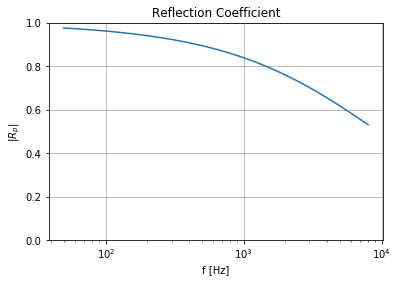

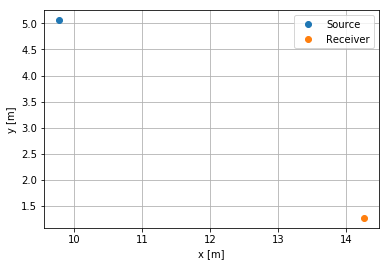

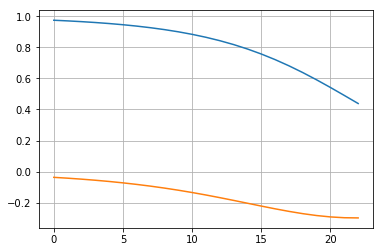

In [54]:
## Find angle of incidence
alpha = math.pi/2-math.acos(np.abs(r[0]-s[0])/r2)
## Flow resistivity, impedance...
sigma = 700000
T = 25
c = 20.05*np.sqrt(273.15+T)
rho = 1.2
k = 2*math.pi*f/c
Zs = (1+5.51*(1000*f/sigma)**(-0.632)-8.42j*(1000*f/sigma)**(-0.632))
Rp = (Zs*np.cos(alpha)-1)/(Zs*np.cos(alpha)+1)
## Signal and source responses
P1 = np.ones(n, dtype=np.float)/r1*np.exp(1j*k*r1)
H1 = np.ones(n, dtype=np.float)
H2 = np.ones(n, dtype=np.float)
## Total pressure. Now pt_clean is pt/p1
Dr=r2-r1
pt_clean = (H1+Rp*H2*r1/r2*np.exp(1j*k*Dr))
## Noise
SNR = 30
An = abs(pt_clean/10**(SNR/20))
Phin = np.random.uniform(-math.pi,math.pi,len(f))

pt = pt_clean+An*np.exp(1j*Phin)
pt_real = np.real(pt)
pt_imag = np.imag(pt)


plt.plot(f,np.abs(Rp))
plt.xscale('log')
plt.grid()
plt.xlabel('f [Hz]')
plt.ylabel(r'$|R_p|$')
plt.ylim(0,1)
plt.title(r'Reflection Coefficient')
plt.show()
plt.figure()
plt.plot(s[0],s[1],'o')
plt.plot(r[0],r[1],'o')
plt.grid()
plt.legend(['Source', 'Receiver'])
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')

plt.figure()
plt.plot(np.real(Rp))
plt.plot(np.imag(Rp))
plt.grid()

## 3. Inference

<p>The parameters that we can measure or we know.
1. Total pressure: $P_t$.
2. Temperature: $T$. Accuracy $\pm 0.2^{\circ}$C (Vaisala WTS520).
3. Coordinates: $\mathbf{s}$ and $\mathbf{r}$. Accuracy $\pm 0.015$ m. Also inaccuracy due to the bad manipulation of the device should be included.
4. Flow resistivity: $\sigma$. We know and approximation but we want to infer it. Nord2000 and Nordtest ranges. In this case, lets assume the case of compacted field and gravel $\rightarrow$ 500 [kNs/m$^4$] and a range of [400-630].
5. Directivity and source signals: We will assume they are equal to one.


In [55]:
# Known data from sensors and forward model (deviation, etc...)
T_dev = 0.2
r_dev = 0.015 # Error of the instrument
r_man_dev = 0.3 # Error due to manipulation
r_tot = r_dev+r_man_dev
sigma_mean = 500000
sigma_dev = 500000
# Measured data with errors (Synthetic data)
Tm = np.random.normal(T, T_dev)
sm = np.random.normal(s, r_tot)
sim = [sm[0],-sm[1]]
rm = np.random.normal(r, r_tot)
D = len(rm) # Dimensions
##
## Noisy Results
r1m = np.linalg.norm(np.subtract(sm,rm))
r2m = np.linalg.norm(np.subtract(sim,rm))
cm = 20.05*np.sqrt(273.15+Tm)
km = 2*math.pi*f/cm
Zs = (1+5.51*(1000*f/sigma_mean)**(-0.632)-8.42j*(1000*f/sigma_mean)**(-0.632))
Rpm = (Zs*np.cos(alpha)-1)/(Zs*np.cos(alpha)+1)
## Signal and source responses
Dr=r2m-r1m


(-2, 2)

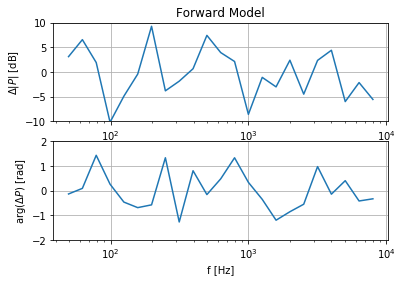

In [56]:
pt_forward= (H1+Rpm*H2*r1/r2*np.exp(1j*km*Dr))
plt.figure()
plt.subplot(2,1,1)
plt.title('Forward Model')
p_diff = pt_clean/pt_forward
plt.plot(f,20*np.log10(abs(p_diff)))
plt.xscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Delta |P|$ [dB]')
plt.ylim(-10,10)
plt.grid()
plt.subplot(2,1,2)
plt.plot(f,np.angle(p_diff))
plt.xscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'arg$(\Delta P)$ [rad]')
plt.grid()
plt.ylim(-2,2)

## Priors

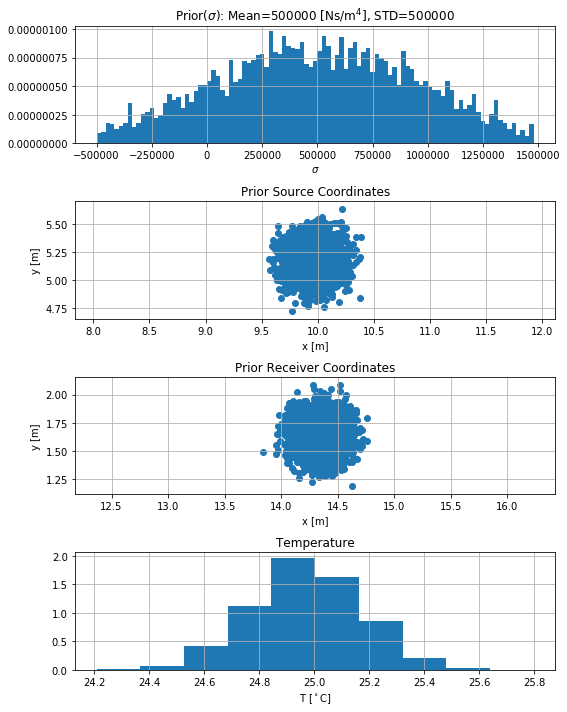

In [57]:
#samples = fit.extract(permuted=True)
plt.figure(figsize=(8,10))
plt.subplot(4,1,1)
plt.hist(np.random.normal(sigma_mean,sigma_dev,4000),normed=True,bins=np.arange(sigma_mean-2*sigma_dev, sigma_mean+2*sigma_dev, 4*sigma_mean/100))
plt.title(r'Prior($\sigma$): Mean='+str(sigma_mean)+' [Ns/m$^4$], STD='+str(sigma_dev))
plt.grid()
plt.xlabel(r'$\sigma$')
cov = [[r_dev, 0],[0 ,r_dev]]
x = np.random.multivariate_normal(sm,cov,4000)
plt.subplot(4,1,2)
plt.scatter(x[:,0],x[:,1])
plt.axis('equal')
plt.title(r'Prior Source Coordinates')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.grid()
plt.subplot(4,1,3)
x = np.random.multivariate_normal(rm,cov,4000)
plt.scatter(x[:,0],x[:,1])
plt.axis('equal')
plt.title(r'Prior Receiver Coordinates')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.grid()
hT = np.random.normal(Tm,T_dev,4000)
plt.subplot(4,1,4)
plt.hist(hT,normed=True)
plt.grid()
plt.xlabel(r'T [$^\circ$C]')
plt.title('Temperature')
plt.show
plt.tight_layout()

## Model Sigma and coordinates (It works)

In [58]:
data = dict(N=len(f), 
            D=D, 
            f=f,
            omega=omega,
            pt_real=pt_real, 
            pt_imag=pt_imag,
            T = Tm,
            T_mean=Tm, 
            T_dev=T_dev, 
            rho=rho, 
            r=r,
            r_mean=rm,
            s_mean=sm, 
            r_dev=r_tot,
            sigma_mean=sigma, 
            sigma_dev=sigma_dev,
           alpha=alpha,
           tau = 1)

reflection_coef = """
data {
    int<lower=0> N; // number of frequencies
    int<lower=0> D; // Dimensions for coordinates
    vector[D] s_mean; // Coordinates source. Prior mean
    vector[D] r_mean; // Coordinates receiver. Prior mean
    vector[N] pt_real; // Measured Pressure at receiver. Real part
    vector[N] pt_imag; // Measured Pressure at receiver. Imaginary part
    vector[N] f; // frequencies
    vector[N] omega; // wavelengths
    real T_mean; // Temperature. Prior mean
    real T_dev; // Temperature deviation
    //real T;
    real r_dev; // Distance deviation
    real sigma_mean; // Nordtest approximation. Prior mean
    real sigma_dev; // Sigma deviation
    real rho; // density
}
parameters {
    real<lower=0> sigma; // Flow resistivity greater than 0
    vector[D] s; // coordinates source
    vector[D] r; // coordinates receiver
    real<lower=0> T;
    real epsilon_real; // variance of the banckground noise
    real epsilon_imag; // variance of the banckground noise
}
model {
    vector[N] A;
    vector[N] B;
    vector[N] Rpr;
    vector[N] Rpi;
    vector[N] den;
    vector[N] mu_real;
    vector[N] mu_imag;
    real r1;
    real r2;
    real alpha;
    real Dr;
    real c;
    real k;
    
    for (n in 1:D){
        s[n] ~ normal(s_mean[n],r_dev); // Prior for source coordinates
        r[n] ~ normal(r_mean[n],r_dev); // Prior for source coordinates
        }
    r1 = sqrt((s[1]-r[1])^2+(s[2]-r[2])^2); // Direct path
    r2 = sqrt((s[1]-r[1])^2+(-s[2]-r[2])^2); // Reflected path
    alpha = pi()/2-atan(fabs(s[2]+r[2])/fabs(s[1]-r[1])); // Angle of incidence
    Dr = r2-r1 ;
    
    sigma ~ normal(sigma_mean, sigma_dev);
    T ~ normal(T_mean,T_dev);
    c = 20.05*sqrt(273.15+T);
    for (n in 1:N){
        k = omega[n]/c;
        A[n] = 1+5.51*(1000*f[n]/sigma)^(-0.632);
        B[n] = -8.42*(1000*f[n]/sigma)^(-0.632);
        den[n] = (A[n]*cos(alpha)+1)^2+(B[n]*cos(alpha))^2;
        Rpr[n] = ((A[n]^2+B[n]^2)*cos(alpha)^2-1)/den[n];
        Rpi[n] = (2*B[n]*cos(alpha))/den[n];
        mu_real[n] = 1+r1/r2*(Rpr[n]*cos(k*Dr)-Rpi[n]*sin(k*Dr));
        mu_imag[n] = r1/r2*(Rpr[n]*sin(k*Dr)+Rpi[n]*cos(k*Dr));
        pt_real[n] ~ normal(mu_real[n], epsilon_real); // I think the problem is here in both real and imaginary part.
        pt_imag[n] ~ normal(mu_imag[n], epsilon_imag); 
      }
    
}
"""

fit_model = pystan.StanModel(model_code=reflection_coef)
fit = fit_model.sampling(data=data)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c197ef4c6158e1dced79c38e6a448bb7 NOW.


# Plots

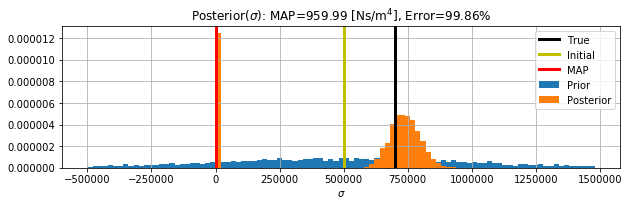

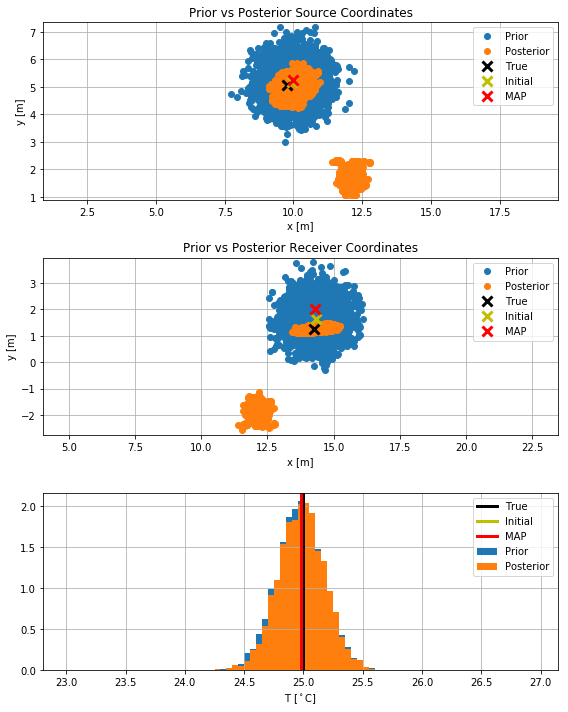

In [59]:
samples = fit.extract(permuted=True)
fit_opt = fit_model.optimizing(data=data)

## Sigma
sigma_mean_post = np.mean(samples['sigma'])
sigma_std_post = (np.std(samples['sigma'])-sigma)/sigma*100
sigma_map = float(fit_opt['sigma'])
sigma_error = abs(round((sigma_map-sigma)/sigma*100,2))
plt.figure(figsize=(10,12))
plt.subplot(4,1,1)
plt.hist(np.random.normal(sigma_mean,sigma_dev,4000),normed=True,bins=np.arange(sigma_mean-2*sigma_dev, sigma_mean+2*sigma_dev, 4*sigma_mean/100))
plt.hist(fit['sigma'],bins=np.arange(sigma_mean-2*sigma_dev, sigma_mean+2*sigma_dev, 4*sigma_mean/100),normed=True)
plt.axvline(x=sigma,color='k',linewidth=3)
plt.axvline(x=sigma_mean,color='y',linewidth=3)
plt.title(r'Posterior($\sigma$): MAP='+str(round(sigma_map,2))+' [Ns/m$^4$], Error='+str(sigma_error)+'%')
plt.axvline(x=sigma_map,color='r',linewidth=3)
plt.grid()
plt.xlabel(r'$\sigma$')
plt.legend(['True','Initial','MAP','Prior','Posterior'])

## Coordinates
s_post_map = fit_opt['s'] # MAP
r_post_map = fit_opt['r'] # MAP
cov = [[r_tot, 0],[0 ,r_tot]]
x = np.random.multivariate_normal(sm,cov,4000)
plt.figure(figsize=(8,10))
plt.subplot(3,1,1)
A1,=plt.plot(x[:,0],x[:,1],'o')
A2,=plt.plot(samples['s'][:,0],samples['s'][:,1],'o')
A3,=plt.plot(s[0],s[1],'x', color='k',ms=10,mew=3)
A4,=plt.plot(sm[0],sm[1],'x', color='y',ms=10,mew=3)
A5,=plt.plot(s_post_map[0],s_post_map[1],'x', color='r',ms=10,mew=3)
plt.axis('equal')
plt.title(r'Prior vs Posterior Source Coordinates')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.legend([A1,A2,A3,A4,A5],['Prior','Posterior','True','Initial','MAP'])
plt.grid()
plt.subplot(3,1,2)
x = np.random.multivariate_normal(rm,cov,4000)
A,=plt.plot(x[:,0],x[:,1],'o')
A2,=plt.plot(samples['r'][:,0],samples['r'][:,1],'o')
A3,=plt.plot(r[0],r[1],'x', color='k',ms=10,mew=3)
A4,=plt.plot(rm[0],rm[1],'x', color='y',ms=10,mew=3)
A5,=plt.plot(r_post_map[0],r_post_map[1],'x', color='r',ms=10,mew=3)
plt.axis('equal')
plt.title(r'Prior vs Posterior Receiver Coordinates')
plt.xlabel(r'x [m]')
plt.ylabel(r'y [m]')
plt.legend([A1,A2,A3,A4,A5],['Prior','Posterior','True','Initial','MAP'])
plt.grid()

## Temperature
T_map = float(fit_opt['T'])
plt.subplot(3,1,3)
plt.hist(hT,normed=True,bins=np.arange(23,27,0.05))
plt.hist(fit['T'],normed=True,bins=np.arange(23,27,0.05))
plt.grid()
plt.xlabel(r'T [$^\circ$C]')
plt.axvline(x=T,color='k',linewidth=3)
plt.axvline(x=Tm,color='y',linewidth=3)
plt.axvline(x=T_map,color='r',linewidth=3)
plt.legend(['True','Initial','MAP','Prior','Posterior'])
plt.show
plt.tight_layout()

# MCMC results

(-2, 2)

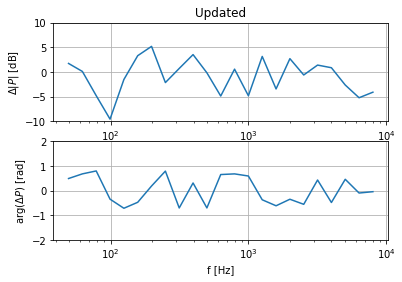

In [60]:
# Measured data with errors (Synthetic data)
si_map = [s_post_map[0],-s_post_map[1]]
## Inferred Results
r1_map = np.linalg.norm(np.subtract(s_post_map,r_post_map))
r2_map = np.linalg.norm(np.subtract(si_map,r_post_map))
c_map = 20.05*np.sqrt(273.15+T_map)
k_map = 2*math.pi*f/c_map
Zs = (1+5.51*(1000*f/sigma_map)**(-0.632)-8.42j*(1000*f/sigma_map)**(-0.632))
alpha_map = math.pi/2-math.acos(np.abs(r_post_map[0]-s_post_map[0])/r2_map)
Rp_map = (Zs*np.cos(alpha_map)-1)/(Zs*np.cos(alpha_map)+1)
## Signal and source responses
Dr_map=r2_map-r1_map
pt_forward= (H1+Rp_map*H2*r1_map/r2_map*np.exp(1j*k_map*Dr_map))

plt.figure()
plt.subplot(2,1,1)
plt.title('Updated')
p_diff = pt_clean/pt_forward
plt.plot(f,20*np.log10(abs(p_diff)))
plt.xscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Delta |P|$ [dB]')
plt.ylim(-10,10)
plt.grid()
plt.subplot(2,1,2)
plt.plot(f,np.angle(p_diff))
plt.xscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'arg$(\Delta P)$ [rad]')
plt.grid()
plt.ylim(-2,2)


In [61]:
print(Tm, T_map, T, rm, r_post_map, r, sm, s_post_map, s, sigma, sigma_mean, sigma_map)

24.97576059457941 24.975211463053764 25 [ 14.34904679   1.64668362] [ 14.31158864   1.99667291] [14.26, 1.27] [ 9.95675768  5.17940657] [ 9.99436244  5.23258624] [9.78, 5.06] 700000 500000 959.9889630108931
